Random simplex generator

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D Plot

In [2]:
# Set number of components
n = 3

In [3]:
arr = np.random.rand(n+1)

In [4]:
arr[0] = 0
arr[-1] = 1
arr

array([0.        , 0.49885676, 0.03159452, 1.        ])

In [5]:
diff = np.diff(arr)

In [6]:
diff

array([ 0.49885676, -0.46726224,  0.96840548])

In [7]:
np.sum(diff)

1.0

In [8]:
def random_comp(n):
    arr = np.random.rand(n+1)
    arr[0] = 0
    arr[-1] = 1
    return np.diff(np.sort(arr))

In [9]:
%timeit random_comp(3)

11.2 µs ± 35.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
@jit(nopython=True)
def random_comp_nb(n):
    arr = np.random.rand(n+1)
    arr[0] = 0
    arr[-1] = 1
    return np.diff(np.sort(arr))

In [11]:
%timeit random_comp_nb(3)

The slowest run took 9.83 times longer than the fastest. This could mean that an intermediate result is being cached.
5.8 µs ± 7.28 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


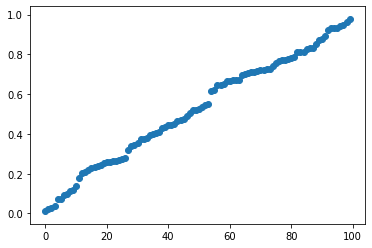

In [12]:
arr = np.empty((100,2))
for i in range(100):
    arr[i,:]= random_comp_nb(2)
plt.scatter(np.arange(100), np.sort(arr[:,1]))

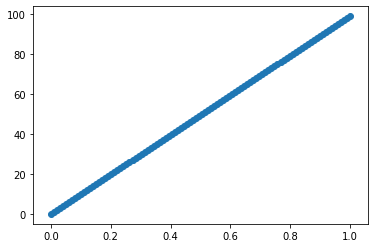

In [13]:
plt.scatter(np.linspace(0,1,100), np.arange(100))

Now try with latin hypercube sampling  

LHS tends to cover the n-dimensional space more evenly than random sampling.


In [14]:
from pyDOE import *

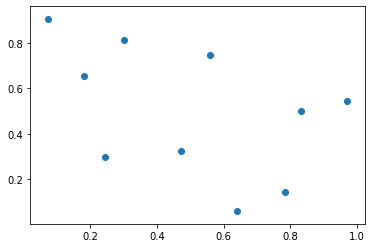

In [15]:
temp = lhs(2, samples=10, criterion='m')
x = temp[:,0]
y = temp[:,1]
plt.scatter(x,y)

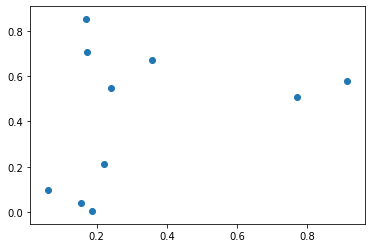

In [16]:
temp = []
for i in range(10):
    temp.append(np.random.rand(2))
temp = np.array(temp)
x = temp[:,0]
y = temp[:,1]
plt.scatter(x,y)

Here is a function which returns a random set of compositions using LHS. Must set the number of samples.

In [45]:
# Returns all samples at once (required)
def lhs_simplex(n_comps, n_samples):
    temp = lhs(n_comps-1, samples=n_samples, criterion='c')
    temp = np.sort(temp, axis=1)
    arr = np.empty((n_samples, n_comps+1))
    arr[:,0] = 0
    arr[:,-1] = 1
    arr[:, 1:-1] = temp
    return np.diff(np.sort(arr))

In [46]:
lhs_simplex(6, 10000)

array([[0.35195, 0.0074 , 0.0028 , 0.0999 , 0.1889 , 0.34905],
       [0.05605, 0.1701 , 0.1824 , 0.0596 , 0.0057 , 0.52615],
       [0.19335, 0.007  , 0.1934 , 0.1493 , 0.0601 , 0.39685],
       ...,
       [0.34165, 0.276  , 0.1885 , 0.0574 , 0.0737 , 0.06275],
       [0.02405, 0.1574 , 0.0732 , 0.0771 , 0.6514 , 0.01685],
       [0.05705, 0.157  , 0.1052 , 0.2346 , 0.0828 , 0.36335]])

Compare the distribution from LHS and random sampling for a 2 components. LHS samples evenly with the number of samples. Random can have large gaps.

In [47]:
temp = lhs_simplex(2,10)
x = temp[:,0]
y = temp[:,1]
plt.scatter(x,x)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

In [48]:
n_comps = 2
n_samples = 10
arr = np.empty((n_samples,n_comps))
for i in range(n_samples):
    arr[i,:]= random_comp_nb(n_comps)
plt.scatter(arr[:,0], arr[:,0])
plt.xlim(0,1)
plt.ylim(0,1)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

Compare LHS and random for 3 components  

LHS

<IPython.core.display.Javascript object>


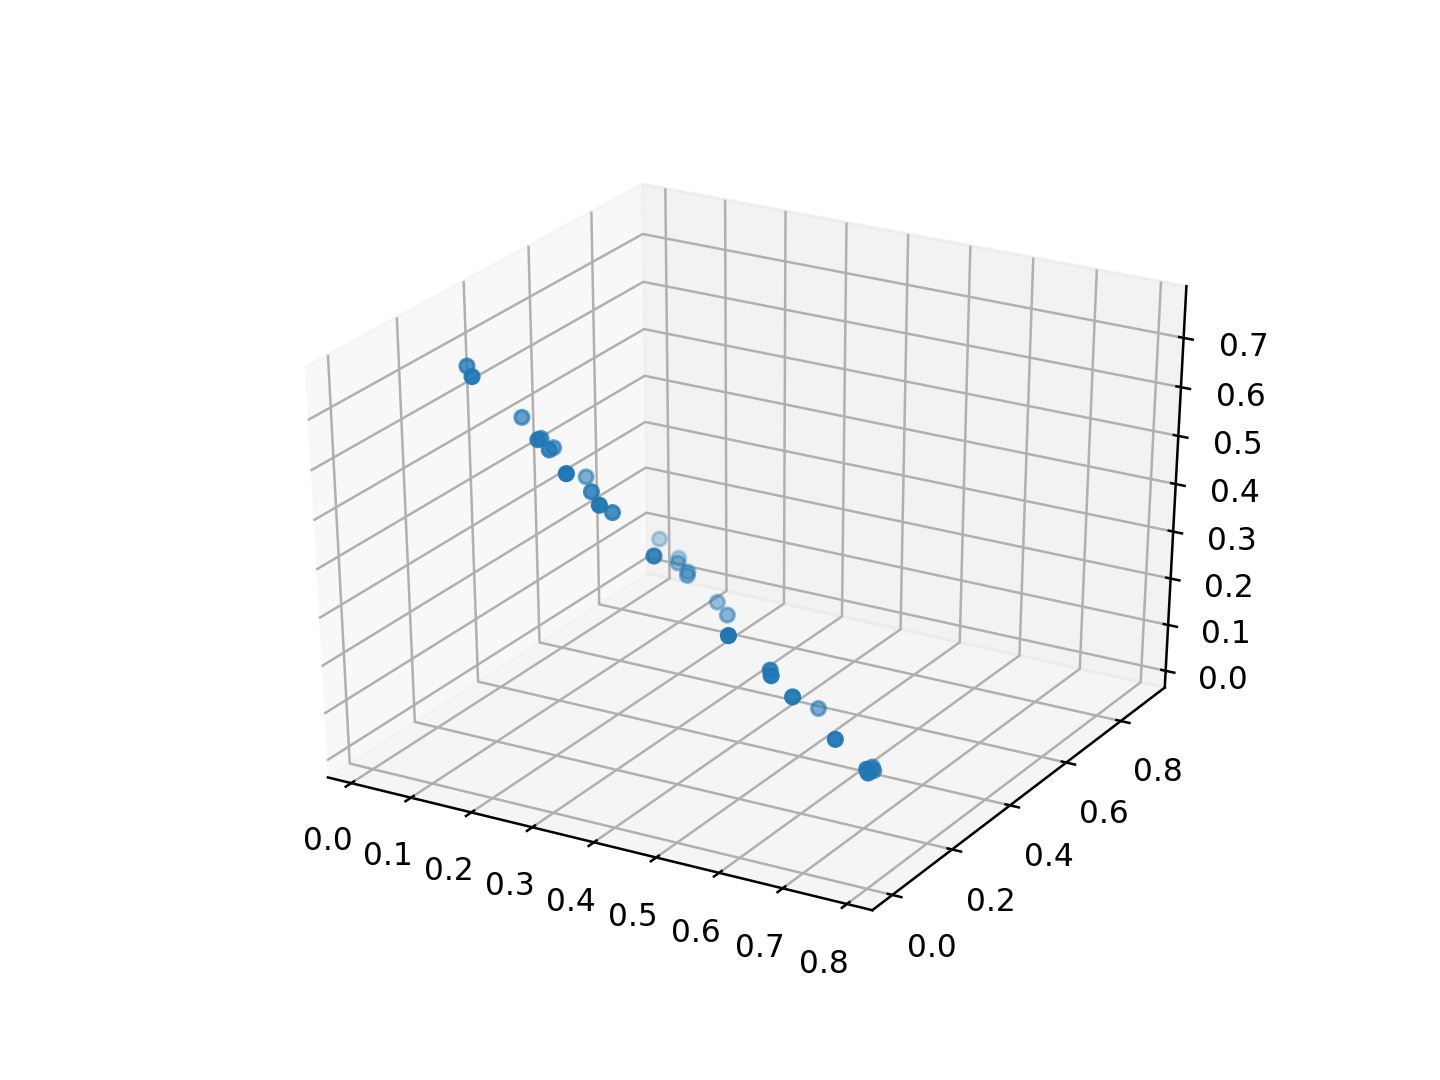

In [49]:
%matplotlib notebook
temp = lhs_simplex(3,30)
x = temp[:,0]
y = temp[:,1]
z = temp[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

Random

<IPython.core.display.Javascript object>


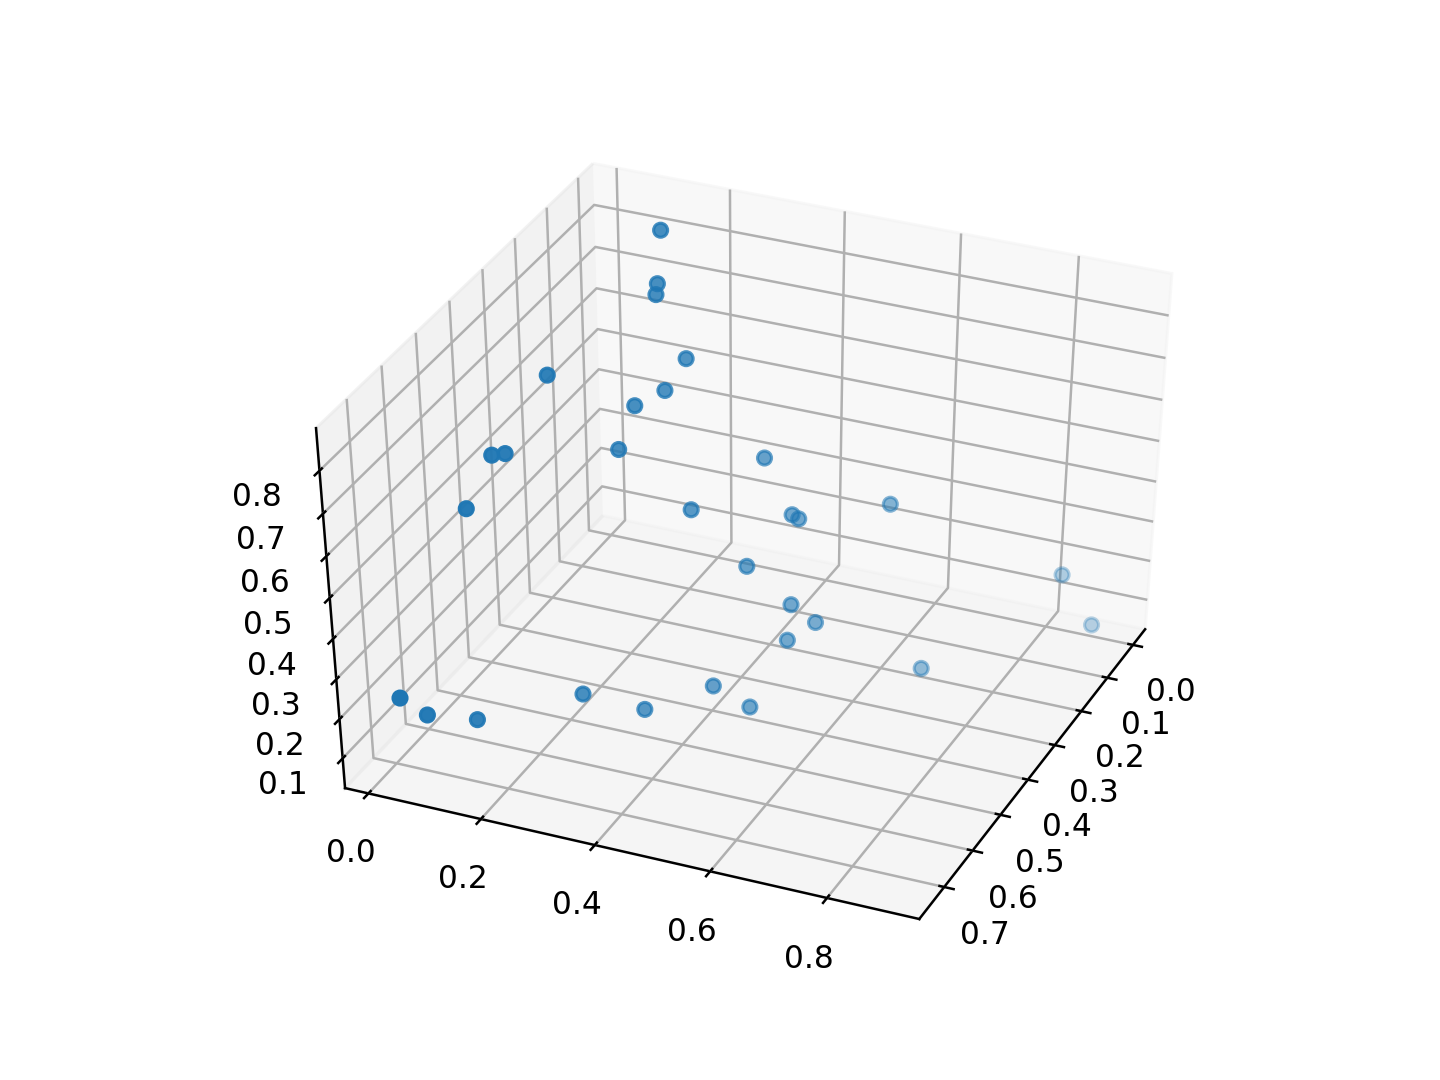

In [50]:
n_comps = 3
n_samples = 30
arr = np.empty((n_samples,n_comps))
for i in range(n_samples):
    arr[i,:]= random_comp_nb(n_comps)
    
x = arr[:,0]
y = arr[:,1]
z = arr[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

In [23]:
XX = lhs_simplex(2, 4)

In [24]:
for i in XX:
    print(i)

[0.0110079 0.9889921]
[0.33753957 0.66246043]
[0.99400023 0.00599977]
[0.68996491 0.31003509]


In [25]:
XX

array([[0.0110079 , 0.9889921 ],
       [0.33753957, 0.66246043],
       [0.99400023, 0.00599977],
       [0.68996491, 0.31003509]])

In [26]:
%time lhs_simplex(6, 10000)

KeyboardInterrupt: 